In [2]:

import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib 
import sklearn

2023-05-04 14:56:07.530525: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
print(tf.__version__)

2.12.0


In [4]:
#model_example = model = tf.keras.models.Sequential([ #
    #tf.keras.layers.Input(shape=(D,)), #tells keras the size of input vector X
    #tf.keras.layers.Dense(1, activation='sigmoid') #tells the output size ex.)1 and activation function
#])

In [5]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #cost and loss function
#the optimizer default is adam which is a fancy way of gradient descent 
#accuracy score is the metric 

In [6]:
#r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
#epoch is number of iterations, in general its trial and error
#validation evaluates model that isn't our dataset
#plt.plot(r.history['loss'], label='loss')
#plt.plot(r.history['val_loss'], label='val_loss')
#looking for smooth curve that tapers off at the end

In [7]:
# load in the data
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
type(data)
data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
data.data.shape #n = samples d = features

(569, 30)

In [9]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
data.target.shape

(569,)

In [12]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
#practice
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)

In [14]:
N, D = X_train.shape

In [15]:
N, D

(381, 30)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #fit and transform finds the parameters emulates the real world
X_test = scaler.transform(X_test) 

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')])

In [18]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

In [19]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 21ms/step - loss: 1.2820 - accuracy: 0.1444 - val_loss: 1.2491 - val_accuracy: 0.1862
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1718 - accuracy: 0.1811 - val_loss: 1.1346 - val_accuracy: 0.2234
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0680 - accuracy: 0.2336 - val_loss: 1.0294 - val_accuracy: 0.2872
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9728 - accuracy: 0.2966 - val_loss: 0.9347 - val_accuracy: 0.3245
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8881 - accuracy: 0.4068 - val_loss: 0.8496 - val_accuracy: 0.3617
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8133 - accuracy: 0.4646 - val_loss: 0.7744 - val_accuracy: 0.4415
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7448 - accuracy: 0.5433 - val_loss: 0.7111 - val_accuracy: 0.5266
Epoch 8/100


In [20]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.1131 - accuracy: 0.9843
Train score: [0.11308162659406662, 0.9842519760131836]
6/6 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.9574
Test score: [0.11651936173439026, 0.957446813583374]


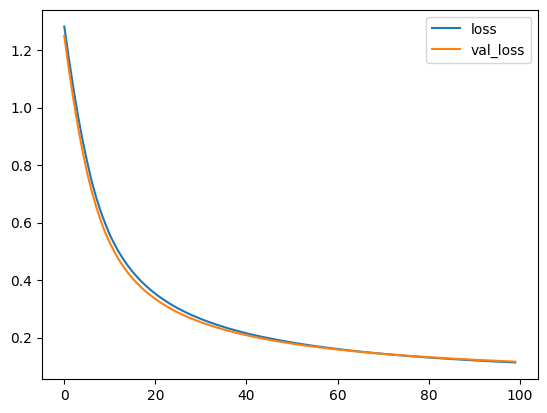

In [21]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

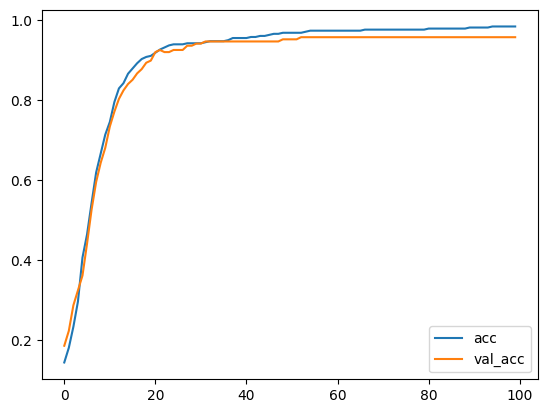

In [22]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [23]:
p = model.predict(X_test) 
print(p)

6/6 [==============================] - 0s 2ms/step
[[2.94652698e-03]
 [9.13762450e-01]
 [6.11391738e-02]
 [9.94763136e-01]
 [9.98014867e-01]
 [9.56681013e-01]
 [1.72619857e-02]
 [3.22150849e-02]
 [6.11135624e-02]
 [9.98120964e-01]
 [1.10585836e-03]
 [2.43108229e-06]
 [4.44943845e-01]
 [1.84108876e-02]
 [9.97722089e-01]
 [9.99574661e-01]
 [7.19196498e-01]
 [8.29734921e-01]
 [9.18367684e-01]
 [9.67857659e-01]
 [9.93243011e-05]
 [2.56556738e-02]
 [9.42386806e-01]
 [2.04233062e-02]
 [1.55457202e-02]
 [9.93904471e-01]
 [2.56027188e-02]
 [9.50649738e-01]
 [9.20258582e-01]
 [4.51176660e-04]
 [2.65724870e-04]
 [8.83913708e-06]
 [9.70742762e-01]
 [9.67909098e-01]
 [9.93474364e-01]
 [1.92324296e-04]
 [9.76175129e-01]
 [4.28922504e-01]
 [3.89627740e-03]
 [6.85522735e-01]
 [9.73232627e-01]
 [6.82218024e-06]
 [9.63143051e-01]
 [2.06892379e-02]
 [6.31965578e-01]
 [7.16927826e-01]
 [5.43964028e-01]
 [9.63496327e-01]
 [9.95843112e-01]
 [8.31054509e-01]
 [1.78862014e-03]
 [9.04024243e-01]
 [2.06910148e

In [24]:
p = np.round(p).flatten()
print(p)

[0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1.]


In [25]:
print("Evaluate output :", model.evaluate(X_test, y_test))
print('Manually calc accuracy:', np.mean(p == y_test))

6/6 [==============================] - 0s 6ms/step - loss: 0.1165 - accuracy: 0.9574
Evaluate output : [0.11651936173439026, 0.957446813583374]
Manually calc accuracy: 0.9574468085106383
